In [4]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [5]:
target1 = pd.read_csv('J080712.05+065344.2.csv')
#abflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = 10**(23-(target1.Mag + target1.Magerr +48.6)/2.5) - 10**(23-(target1.Mag +48.6)/2.5)
#opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

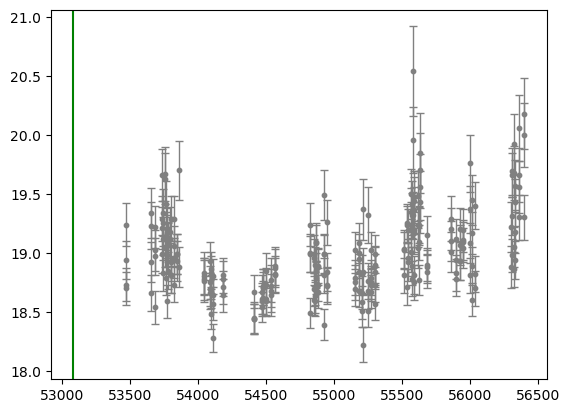

In [6]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x=53080 , color ='g')	
#plt.axvline(x= , color ='g')	

In [7]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

243

In [8]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[0.008060000000114087,
 0.008069999996223487,
 0.00818000000435859,
 185.2781199999954,
 0.0043300000033923425,
 0.004309999996621627,
 0.004310000003897585,
 27.973659999996016,
 0.006480000003648456,
 0.006450000000768341,
 0.006479999996372499,
 51.93239999999787,
 0.005680000002030283,
 0.005470000003697351,
 0.005579999997280538,
 11.944530000000668,
 0.005279999997583218,
 0.005300000004353933,
 0.005289999993692618,
 9.893340000002354,
 0.017079999997804407,
 0.008570000005420297,
 6.962019999999029,
 0.0064399999973829836,
 0.006440000004658941,
 0.006429999993997626,
 5.949330000003101,
 0.0053600000028382055,
 0.00533999999606749,
 0.0053699999989476055,
 7.009109999999055,
 0.012970000003406312,
 0.006509999999252614,
 15.945140000003448,
 0.007519999999203719,
 8.036339999998745,
 0.006489999999757856,
 0.006390000002284069,
 0.006789999999455176,
 20.864009999997506,
 0.006029999996826518,
 0.006030000004102476,
 0.006029999996826518,
 26.96835000000283,
 0.012920000001031

In [9]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

8


[3, 48, 68, 92, 121, 152, 194, 221]

In [10]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[4, 45, 20, 24, 29, 31, 42, 27, 22]

In [11]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [12]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
0,J080712.05+065344.2,1107043044241,18.94,0.16,121.79978,6.89566,53466.16004,0
1,J080712.05+065344.2,1107043044241,19.24,0.18,121.79992,6.89561,53466.16810,0
2,J080712.05+065344.2,1107043044241,18.73,0.14,121.80018,6.89566,53466.17617,0
3,J080712.05+065344.2,1107043044241,18.70,0.14,121.79988,6.89557,53466.18435,0
12,J080712.05+065344.2,1107043044241,19.34,0.21,121.79983,6.89539,53651.46247,0
...,...,...,...,...,...,...,...,...
238,J080712.05+065344.2,1107043044241,19.66,0.23,121.79967,6.89567,56358.19980,0
239,J080712.05+065344.2,1107043044241,19.56,0.22,121.79999,6.89562,56358.20708,0
240,J080712.05+065344.2,1107043044241,20.18,0.30,121.79937,6.89605,56397.13324,0
241,J080712.05+065344.2,1107043044241,20.00,0.27,121.80027,6.89575,56397.14044,0


In [13]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53466.18435

In [14]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

53858.15837

In [15]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54180.17704

In [16]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54565.14127

In [17]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

54944.18087

In [18]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55298.15895

In [19]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55679.18303

In [20]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56035.13731

In [22]:
df_9 = data.iloc[seppt[7]+1:,:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56397.15505

In [ ]:
df_10 = data.iloc[seppt[8]+1:seppt[9],:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

In [ ]:
df_11 = data.iloc[seppt[9]+1:seppt[10],:]
#print(df_11)
df_11.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]

In [ ]:
df_12 = data.iloc[seppt[10]+1:,:]
#print(df_12)
df_12.to_csv('Group12.csv', index=False)
grouped_MJD[11][-1]

In [23]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g1.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g2.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g3.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g4.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g5.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g6.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g7.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g8.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g9.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [ ]:
g10= pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g10.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g11= pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g11.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g12= pd.read_csv('group12.csv')
med1 = np.median(g12.Mag)
centerMJD1 = np.mean(g12.MJD)
medMJD1 = np.median(g12.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g12.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [24]:
med

[18.94,
 19.064999999999998,
 18.76,
 18.67,
 18.865000000000002,
 18.775,
 19.23,
 19.085,
 19.43]

In [25]:
centerMJD

[53466.16810333333,
 53757.77764477273,
 54096.97594105264,
 54488.59533478261,
 54876.61414678571,
 55226.01314833334,
 55586.86447707317,
 55946.99833923078,
 56336.95504714286]

In [26]:
medMJD


[53466.1681,
 53760.275125,
 54093.33135,
 54475.35484,
 54864.247195,
 55212.283415,
 55586.28984,
 55944.306075,
 56329.20869]

In [27]:
medopflux


[9.638290236239665e-05,
 8.590226303258254e-05,
 0.00011376272858234333,
 0.00012359474334444967,
 0.00010328599680525067,
 0.00011221255349005505,
 7.379042301291045e-05,
 8.433437003299938e-05,
 6.137620051647945e-05]

In [29]:
st = 53466
#start of observations

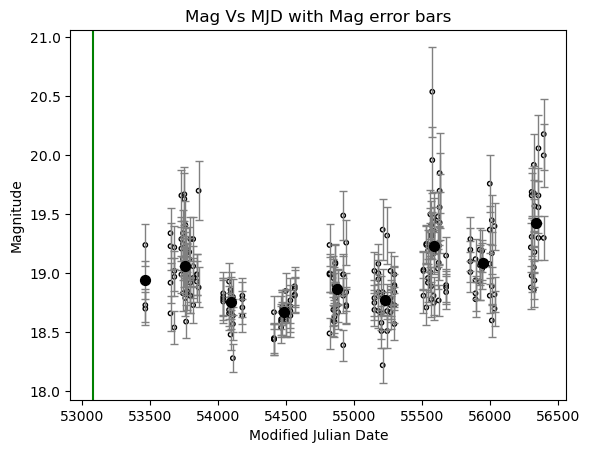

In [30]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 53080  , color ='g')	
#plt.axvline(x=  , color ='g')	

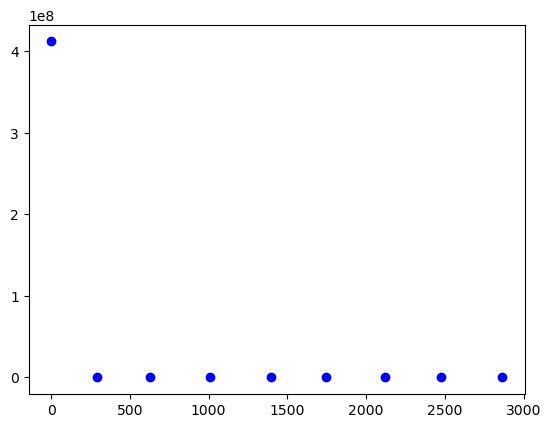

In [31]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [32]:
popt3, pcov3 = curve_fit(f, x, med, maxfev =5000)


In [33]:
popt3

array([1.38671802e-15, 4.22862808e+00, 1.88515903e+01])

In [34]:
pcov3

array([[ 1.08257047e-27, -9.80213808e-14, -1.53756605e-15],
       [-9.80213808e-14,  8.87681246e+00,  1.37749058e-01],
       [-1.53756605e-15,  1.37749058e-01,  6.86020830e-03]])

In [35]:
 np.sqrt(np.diag(pcov3))

array([3.29024387e-14, 2.97939800e+00, 8.28263744e-02])

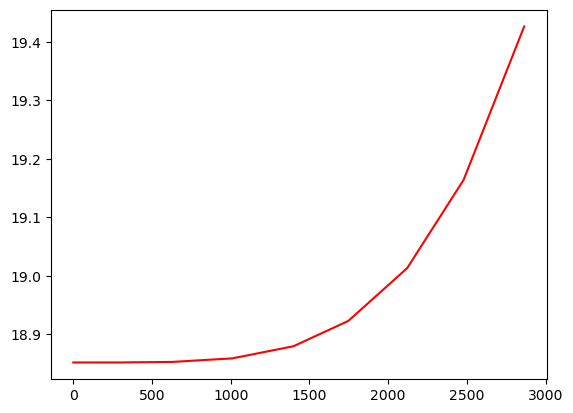

In [36]:
plt.plot(x, f(x,*popt3), 'r-')

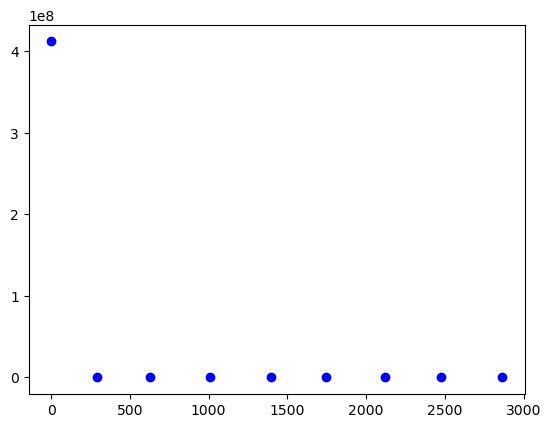

In [37]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [39]:
popt4, pcov4 = curve_fit(f, target1.MJD - st, target1.Mag, maxfev =2000 )

In [40]:
popt4

array([4.16569604e-16, 4.37619519e+00, 1.88799945e+01])

In [41]:
pcov4

array([[ 1.27822054e-29, -3.84525130e-15, -6.71325738e-17],
       [-3.84525130e-15,  1.15698887e+00,  1.99804105e-02],
       [-6.71325738e-17,  1.99804105e-02,  9.58374537e-04]])

In [42]:
 np.sqrt(np.diag(pcov4))

array([3.57522103e-15, 1.07563417e+00, 3.09576249e-02])

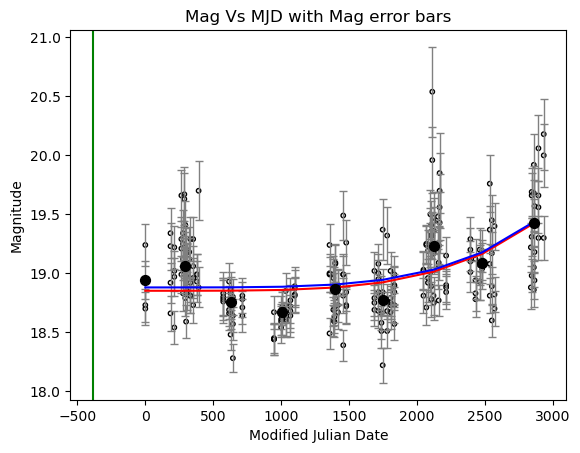

In [43]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 53080 -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x,*popt3), 'r-', zorder=3)
plt.plot(x, f(x,*popt4), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



Text(0.5, 1.0, 'Flux Density Vs MJD with Flux error bars')

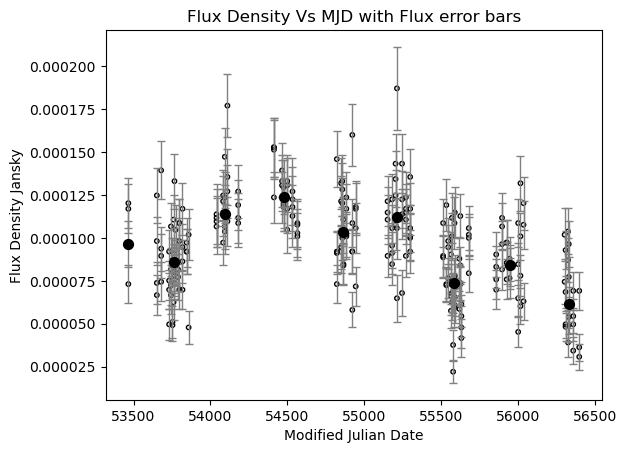

In [44]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

#plt.axvline(x=  , color ='g')	
#plt.axvline(x= , color ='g')

In [45]:
popt2, pcov2 = curve_fit(f, x, medopflux, maxfev =5000)

In [46]:
popt2

array([-9.35021414e-19,  3.95747406e+00,  1.05352980e-04])

In [47]:
pcov2

array([[ 5.62749561e-34,  7.61768567e-17, -1.04105324e-22],
       [ 7.61768567e-17,  1.03136605e+01, -1.39343633e-05],
       [-1.04105324e-22, -1.39343633e-05,  5.81010609e-11]])

In [48]:
 np.sqrt(np.diag(pcov2))

array([2.37223431e-17, 3.21148883e+00, 7.62240519e-06])

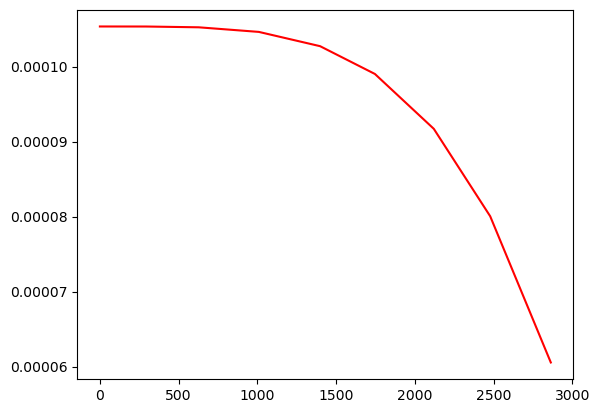

In [49]:
plt.plot(x, f(x,*popt2), 'r-')

In [50]:
popt1, pcov1 = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [51]:
popt1

array([-5.61567264e-19,  4.01162226e+00,  1.05102473e-04])

In [52]:
pcov1

array([[ 2.16249647e-35,  4.87411022e-18, -7.22292586e-24],
       [ 4.87411022e-18,  1.09884523e+00, -1.60901403e-06],
       [-7.22292586e-24, -1.60901403e-06,  6.33482996e-12]])

In [53]:
 np.sqrt(np.diag(pcov1))

array([4.65026502e-18, 1.04825819e+00, 2.51690881e-06])

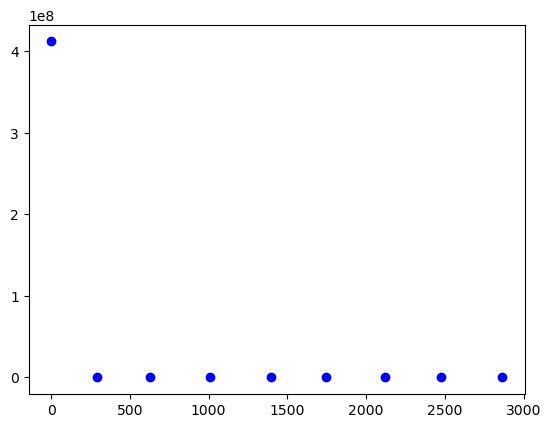

In [54]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


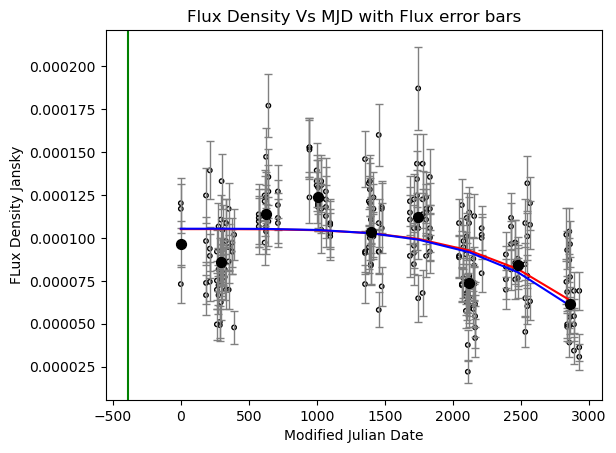

In [58]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x= 53080-st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x, *popt1), 'r-', zorder=3)
plt.plot(x, f(x,*popt2), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [56]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [57]:
actual = medopflux
predicted1 = func(x,)
predicted2 = func(x,)



NameError: name 'func' is not defined

In [ ]:
mase(actual,predicted1)

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,)
chi2 = sum((resid / func(x,))**2)
chi2_red = chi2 / dof
